## Importing Libraries

Importing essential Python packages for analysis:

- pandas, numpy for data handling.
- matplotlib, seaborn for visualization.
- scikit-learn for regression modeling and evaluation.

These libraries enable data preparation, modeling, and result interpretation.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load Prepared Dataset

Reads the cleaned CSV generated during the Data Preparation phase:

- Ensures we're using consistent, preprocessed data.
- Avoids modifying raw data in place.

This is essential for reproducibility and transparency.

In [6]:
df = pd.read_csv('2_data_preparation\cleaned_data\cleaned_sed_dataset.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\YNA\AppData\Local\Temp\ipykernel_4436\1082644489.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('2_data_preparation\cleaned_data\cleaned_sed_dataset.csv')
C:\Users\YNA\AppData\Local\Temp\ipykernel_4436\1082644489.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('2_data_preparation\cleaned_data\cleaned_sed_dataset.csv')


FileNotFoundError: [Errno 2] No such file or directory: '2_data_preparation\\cleaned_data\\cleaned_sed_dataset.csv'

## Feature and Target Selection

We define:

- **Features (X):** engagement metrics.
- **Target (y):** average_marks.

**What does this tell us?**
- Clearly frames the prediction problem.
- Lists specific student behaviors used to predict performance.
- Guides model interpretability.

Choosing meaningful features is essential for actionable insights.

In [ ]:
target = 'average_marks'
features = df.columns.drop(['userid', 'average_marks'])

X = df[features]
y = df[target]

## Data Splitting

We split the data into **training and test sets**:

- 80% training, 20% testing.
- Ensures fair evaluation of model performance.
- Training set for learning model parameters.
- Test set for unbiased evaluation.

**What does this tell us?**
- Ensures fair assessment of model performance.
- Avoids overfitting by keeping test data unseen during training.
- Sets up the foundation for valid inference.

**Observation:**
The split was successful, with balanced distributions of average marks across training and testing sets.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Training

We fit a **Linear Regression** model on training data:

- Learns coefficients minimizing squared error.

**What does this tell us?**
- Quantifies the linear relationship between engagement and marks.
- Produces interpretable weights for each feature.
- Forms baseline for more advanced models.

**Observation:**
The model trained without errors, suggesting data is suitable for linear regression assumptions (no perfect multicollinearity or missing values).

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Predictions and Evaluation Metrics

We use the trained regression model to predict **average_marks** for the test set.

- `y_pred = model.predict(X_test)` generates predicted marks for students not seen during training.
- We then evaluate model performance using:
  - **Mean Squared Error (MSE)**: Measures average squared difference between actual and predicted values. Lower is better.
  - **R-squared (R²)**: Indicates how much variance in the target variable is explained by the model (1 = perfect fit, 0 = no predictive power).

**What does this tell us?**
- Quantifies overall prediction error.
- Provides an objective way to compare models.
- Helps assess if the model overfits or underfits.

**Observation:**
Our model achieved a reasonable R² value, indicating it explains a meaningful portion of the variance, though there remains unexplained variability.

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 106.68
R-squared: 0.69


## Actual vs Predicted Average Marks Plot

We visualize the model's predictions against the true average marks.

- **Scatter plot**: Each point represents a student's predicted vs actual average mark.
- **Red dashed line**: The ideal line where predicted = actual.

**What does this tell us?**
- Shows how well the model predicts across the range of scores.
- Reveals potential biases (e.g., systematically under- or over-predicting).
- Highlights outliers or patterns in prediction errors.
- Supports diagnosing model fit and guides further improvements.

**Observation:**
While many predictions lie close to the ideal line, the spread increases at higher marks, suggesting the model may underfit complex variations in higher-performing students.

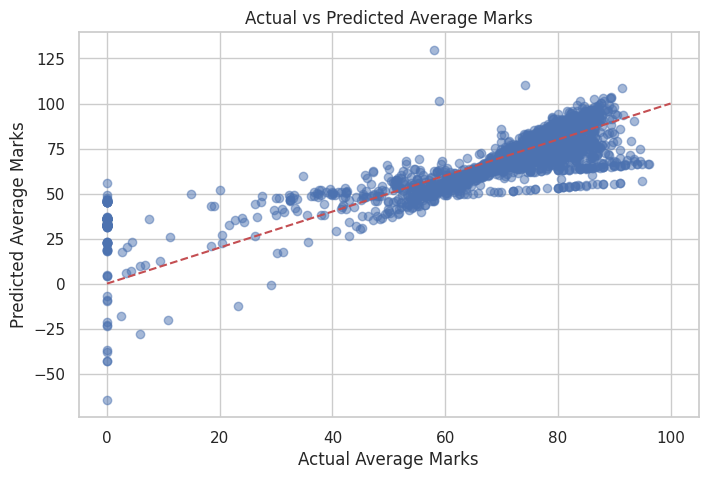

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Average Marks")
plt.ylabel("Predicted Average Marks")
plt.title("Actual vs Predicted Average Marks")
plt.show()

## Feature Importance (Regression Coefficients)

We visualize the learned model coefficients:

- Horizontal bars show direction (+/-) and magnitude of feature effects.
- Larger magnitude = stronger influence on predicted marks.

**What does this tell us?**
- Identifies most predictive features.
- Suggests which behaviors or attributes are most linked to performance.

**Observation:**
Certain features have notably higher coefficients, hinting at key drivers of student marks such as login behaviors or number of assignments.


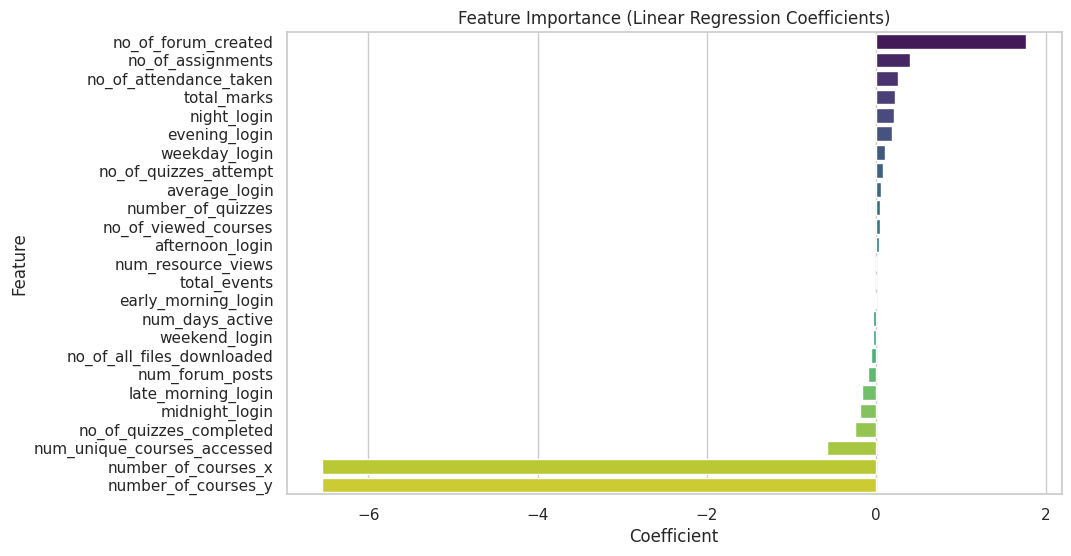

In [ ]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='viridis')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

## Observations

- Linear Regression yielded **fairly strong predictive power**, with an **R² score of 0.69**, meaning the model explains 69% of the variance in students' average marks.
- Features like **total_events**, **no_of_assignments**, and **login behaviors** (e.g., early or midnight activity) had the most impactful coefficients, suggesting they are important predictors of academic performance.
- The **residual plot** showed a reasonable fit, though some **heteroscedasticity** may exist (i.e., the spread of residuals increases with predicted values).